### 1-1 Linear Regression with one variable

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import pandas as pd
import numpy as np
import math

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

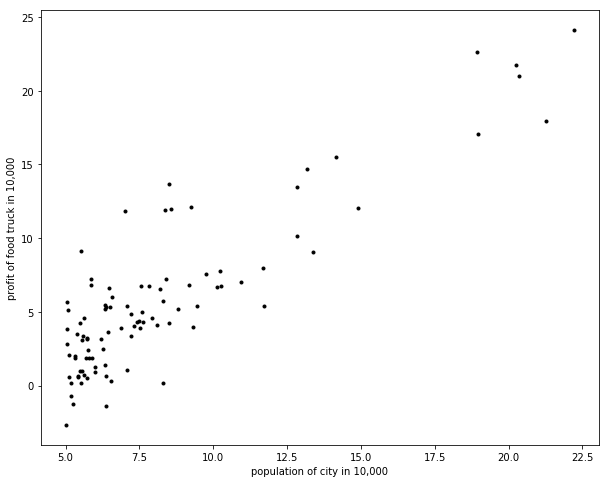

In [2]:
data1 = pd.read_csv('ex1data1.csv') #reading data
data1.columns = ['population', 'profit']
X1 = data1['population']
y1 = data1['profit']

%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(X1, y1, 'k.')

plt.xlabel('population of city in 10,000')
plt.ylabel('profit of food truck in 10,000')
plt.show()

In [3]:
m = len(y1)

In [4]:
def cost(w0, w1, m, X, y):  
    C = 0
    for i in range(m):
        C = C + (h(X[i], w0, w1) - y[i] )**2
        C_new = C/(2.0*m)
    return C_new

In [5]:
def h(X, w0, w1) :  
    h = w0 + w1*X
    return h

def grad_cost(w0, w1,X,y,m) :  
    DiffC_w0 = 0
    DiffC_w1 = 0
    
    for i in range(m):
        
        DiffC_w0 = DiffC_w0 + (h(X[i],w0,w1) - y[i])
        DiffC_w0 = DiffC_w0/m
        
        DiffC_w1 = DiffC_w1 + (h(X[i],w0,w1) - y[i])*X[i]
        DiffC_w1 = DiffC_w1/m
        
    gradCost = [DiffC_w0, DiffC_w1]
    return gradCost
              
def new_param(w0, w1, alpha, gCost) :  
    
    param_w0 = w0 - (alpha * gCost[0] )
    param_w1 = w1 - (alpha * gCost[1] )
    new_param = [param_w0, param_w1]
    
    return new_param  

In [6]:
def gradient_descent_without_matrix(X, y , m, alpha):
    w0 = 0
    w1 = 0
   # for i in range(iterations):
    w0,w1 = new_param(w0,w1, alpha ,gCost=grad_cost(w0,w1,X,y,m))
        
    return w0, w1   

In [7]:
w0 = 0
w1 = 0
old_cost = cost (w0, w1, m, X1, y1)

In [8]:
alpha = 0.01
#iterations = 2500
error = 0.0001
converge = False
while not converge:
    w0 , w1 = gradient_descent_without_matrix(X1, y1, m, alpha )
    new_cost = cost (w0, w1, m, X1, y1)
    
    if abs(old_cost- new_cost)<=error:
        converge = True
    else:
        old_cost = new_cost
print (w0, w1)

7.410333052252099e-05 0.0004810788260169604


In [9]:
cost (w0, w1, m, X1, y1) #Final Cost

30.763326943191114

In [10]:
def rmse( true_value, predicted_value):
    rmse = np.sqrt(sum((predicted_value - true_value) ** 2) / len(true_value))
    
    return rmse

In [11]:
prediction = w0 + w1 * X1
rmse = rmse(y1, prediction)
print("RMSE = ", rmse)#RMSE

RMSE =  7.843892776318543


### 2- Linear Regression with two variable

In [12]:
data2 = pd.read_csv('ex1data2.csv')
data2.columns = ['house_size', 'total_bedrooms', 'price']
data2_norm = (data2 - np.mean(data2, axis=0) / np.std(data2, axis=0))

#### Gradient Descent Without Matrix 

In [13]:
def cost_2(w0, w1, w2, m, X1, X2, y):  
    C = 0
    for i in range(m):
        C = C + (h_2(X1[i], X2[i], w0, w1, w2) - y[i] )**2
        C_val = C/(2.0*m)
        
    return C_val

In [14]:
def h_2(X1, X2, w0, w1, w2) :  
    h = w0 + w1*X1 + w2 * X2
    return h

def grad_cost_2(w0, w1, w2 ,X1, X2 ,y, m) :  
    DiffC_w0 = 0
    DiffC_w1 = 0
    DiffC_w2 = 0
    
    for i in range(m):
        DiffC_w0 = DiffC_w0 + (h_2(X1[i], X2[i],w0, w1, w2) - y[i])
        DiffC_w0 = DiffC_w0/m
        
        DiffC_w1 = DiffC_w1 + (h_2(X1[i], X2[i],w0, w1, w2) - y[i])*X1[i]
        DiffC_w1 = DiffC_w1/m
        
        DiffC_w2 = DiffC_w2 + (h_2(X1[i], X2[i],w0, w1, w2) - y[i])*X2[i]
        DiffC_w2 = DiffC_w2/m
        
    gradCost2 = [DiffC_w0, DiffC_w1, DiffC_w2]
    return gradCost2
              
def new_param_2(w0, w1, w2, alpha, DCost) :  
    param_w0 = w0 - (alpha * DCost[0] )
    param_w1 = w1 - (alpha * DCost[1] )
    param_w2 = w2 - (alpha * DCost[2] )
    new_param = [param_w0, param_w1, param_w2]
    
    return new_param

In [15]:
def gradient_descent_without_matrix_2(X1, X2, y , m, alpha):
    w0 = 0
    w1 = 0
    w2 = 0
    #for i in range(iterations):
    w0,w1, w2 = new_param_2(w0, w1, w2, alpha , DCost=grad_cost_2(w0, w1, w2 , X1, X2, y, m))
    
    return w0, w1, w2

In [16]:
X1_2 = data2['house_size']
X2_2 = data2['total_bedrooms']
y2 = data2['price']

In [17]:
m2 = len(y2)
alpha2 = 0.01
w0 = 0
w1 = 0
w2 = 0
old_cost2 = cost_2(w0, w1, w2, m2, X1_2, X2_2, y2)

In [18]:
error = 0.0001
converge = False
while not converge:
    w0, w1, w2 = gradient_descent_without_matrix_2(X1_2, X2_2, y2 , m2, alpha2)
    new_cost2 = cost_2(w0, w1, w2, m2, X1_2, X2_2, y2)
    
    if abs(old_cost2 - new_cost2) <= error:
        converge = True
    else:
        old_cost2 = new_cost2
    
print (w0, w1, w2)

(53.501679940231654, 65275.87842635523, 161.90386947389067)


In [19]:
cost_2(w0, w1, w2, m2, X1_2, X2_2, y2) #Final Cost

9803912170162362.0

In [20]:
prediction2_1 = w0 + w1 * X1_2 + w2* X2_2

In [21]:
rmse = mean_squared_error(y2, prediction2_1) #RMSE
print("RMSE =" , rmse)

('RMSE =', 1.9607824340324724e+16)


#### 2-1 Gradient Descent With Matrix

In [22]:
data2 = pd.read_csv('ex1data2.csv')
data2.columns = ['house_size', 'total_bedrooms', 'price']
#normalization
data2_norm = (data2 - np.mean(data2, axis=0) / np.std(data2, axis=0))
data2.insert(0, 'Ones', 1)
X2 = data2[['Ones', 'house_size', 'total_bedrooms']]
y2 = data2['price']
m2 = len(y2)

In [23]:
X2 = np.matrix(X2.values)  
y2 = np.matrix(y2.values) 
theta_val = np.array([0,0,0])
theta2 = np.matrix(theta_val) 

In [24]:
matrix_j = int(theta2.ravel().shape[1])

In [25]:
#generalized gradient descent function for polynomial regression
def gradient_descent_with_matrix(x, y, theta, alpha,precision, max_alpha=0, max_iteration= 1000000 ):
    
    m = len(y) 
    theta_history = [] 
    y_preds = []
    costs = []
    y_pred = np.dot(x, theta)
    error = y_pred - y 
    old_cost = 0
    new_cost = np.sum(error ** 2) / (2 * m)
    costs.append(new_cost)
    
    
    y_preds.append(y_pred)
    
    theta_history.append(theta)
    iters = 0 # setting iterations to 0
    iters = iters + 1
    while abs(new_cost - old_cost) >= precision: # for optimization
        
        old_cost = new_cost #precision 
        gradient = x.T.dot(error)/m 
        theta = theta - alpha * gradient  #updating weight
        theta_history.append(theta) #storing histoy of weights
        y_pred = np.dot(x, theta)
        error = y_pred - y 
        new_cost = np.sum(error ** 2)/(2 * m)
        costs.append(new_cost)
        y_preds.append(y_pred)
        iters = iters + 1
        
        if iters > max_iteration:
            print("Exceeded maximum iterations")
            break

        
    return theta_history, y_preds, iters, costs, alpha

In [26]:
X_ones = np.c_[np.ones(X1.shape[0]), X1] #adding ones column to the matrix
theta_iters = np.array([0., 0.] )  #creating a numpy array 
theta, y_preds, iterations, cost, alpha = gradient_descent_with_matrix(X_ones, y1, theta_iters, alpha = 0.01,precision = 0.000001, )

In [27]:
print "Cost = ", cost[-1]
print "RMSE = ", math.sqrt(cost[-1])

Cost =  3.45985707443
RMSE =  1.86006910475


#### 2-2 Normal Equation

In [28]:
data2 = pd.read_csv('ex1data2.csv')
data2.columns = ['house_size', 'total_bedrooms', 'price']
#normalization
data2_norm = (data2 - data2.mean()) / (data2.max() - data2.min())
data2 = data2_norm
data2.insert(0, 'Ones', 1)
columns = data2.shape[1]  
X2 = data2.iloc[:,0:columns-1]  
y2 = data2.iloc[:,columns-1:columns]

In [29]:
X2_data2 = np.matrix(X2)  
y2_data2 = np.matrix(y2)  

In [30]:
y2_ = np.reshape(y2,(-1,1))
X2.T
M1 = X2.T.dot(X2)
M2 = np.linalg.inv(M1)
M3 = M2.dot(X2.T)
theta2_normal = M3.dot(y2_)

theta2_normal

array([[ 4.25007252e-17],
       [ 9.49299388e-01],
       [-6.17832472e-02]])

In [31]:
predict2_normal = X2.dot(theta2_normal)
#predict2_normal = predict2_normal.T

In [32]:
rmse = mean_squared_error(y2, predict2_normal)
print("RMSE =" , rmse)

('RMSE =', 0.014713444642714518)


### 3-1 Linear regression with multiple variables using matrix

In [33]:
data3 = pd.read_csv('ex1data3.csv')
data3 = data3[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','price']].copy()
data3_norm = (data3 - data3.mean()) / (data3.max() - data3.min())
data3 = data3_norm
data3.insert(0, 'Ones', 1)

X3 = data3[['Ones', 'MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]
y3 = data3['price']

In [34]:
#X_ones = np.c_[np.ones(X3.shape[0]), X3] #adding ones column to the matrix
theta_iters = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.])  #creating a numpy array 
theta, y_preds, iterations, cost, alpha = gradient_descent_with_matrix(X3, y3, theta_iters, alpha = 0.01,precision = 0.001, )

In [35]:
print "Cost = ", cost[-1]
print "RMSE = ", math.sqrt(cost[-1])

Cost =  0.0282978819095
RMSE =  0.168219742924


### 3-2 Normal Equation

In [36]:
X3.T
M= (X3.T).dot(X3)
M1= np.linalg.inv(M)
M2= M1.dot((X3.T))
theta3_normal = M2.dot(y3.T)

In [37]:
predict3_normal = X3.dot(theta3_normal)
predict3_normal = predict3_normal.T

In [38]:
rmse3 = mean_squared_error(y3, predict3_normal)
print "RMSE =" , rmse3

RMSE = 0.022290005820579644


### 3-3 SkLearn

In [39]:
data3 = pd.read_csv('ex1data3.csv')
data3 = data3[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','price']].copy()
data3_norm = (data3 - data3.mean()) / (data3.max() - data3.min())
data3 = data3_norm
#data3.insert(0, 'Ones', 1)
X3 = data3[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]
y3 = data3['price']

In [40]:
Lin_reg= LinearRegression()
Lin_reg.fit(X3, y3)
predict3_sklearn = Lin_reg.predict(X3)

In [41]:
rmse3_sklearn = mean_squared_error(y3, predict3_sklearn)
print "RMSE= ", rmse3_sklearn

RMSE=  0.022290005820579648


### 3-4 Tensor Flow

In [46]:
import tensorflow as tf
import numpy as np

In [47]:
data3 = pd.read_csv('ex1data3.csv')
data3 = data3[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','price']].copy()
data3_norm = (data3 - data3.mean()) / (data3.max() - data3.min())
data3 = data3_norm
cols = data3.shape[1]
X3 = data3[data3.columns[:cols-1]]
X3.insert(0,'Ones',1) 
y3 = data3[data3.columns[cols-1:]]

In [48]:
theta = tf.Variable(tf.random_normal([X3.shape[1],1], mean=0.0, stddev=1.0, dtype=tf.float64))
x = tf.placeholder(tf.float64)
y = tf.placeholder(tf.float64)

y_pred = tf.matmul(x, theta) #predicted value
cost = tf.reduce_mean(tf.pow(y_pred - y, 2))  #cost function

In [49]:
sess = tf.Session()
init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)  #gradient optimizer
costs = []

def gradient_descent_tensorflow(iterations, X, Y):
    sess.run(init)
    new_cost = 0
    for epoch in range(iterations):
        sess.run(optimizer, feed_dict={x:X, y:Y})
        new_cost = sess.run(cost, feed_dict={x:X, y:Y})
        costs.append(new_cost)
                
    sess.close()
    return math.sqrt(new_cost)

rmse = gradient_descent_tensorflow(10000, X3, y3)
print "RMSE = ",rmse

RMSE =  0.151540539821
